In [72]:
from sympy import *
from sympy import I as j #import complex number as j
from sympy.solvers.solveset import linsolve, nonlinsolve
from sympy.parsing.latex import parse_latex
from sympy.parsing.sympy_parser import parse_expr
from IPython.display import display, Math
import ipywidgets as widgets
#define symbols
#dont use i as a symbol, because it is reserved for the imaginary unit!!!
R=symbols("R_{0:7}")
I=symbols("I_{0:7}")
i=symbols("i_{0:7}")
C=symbols("C_{0:7}")
L=symbols("L_{0:7}")
V=symbols("V_{0:7}")
Vin = symbols("V_in")
Vr = symbols("V_i*n")
t =symbols("t", real=True)
s = symbols("s")
omega=symbols("omega")
#j=symbols("j")
Pr3 = symbols("P_R3")

In [116]:
# out = widgets.Output(layout={'border': '1px solid black'})
outIPy = widgets.Output(layout={'border': '2px solid black'})
initNumOfBoxes = {"new" : 2}
numOfR = 5
textBox = []
subsEqNum = 1

pEq = []
linEq = []
lapEq = []


style = {'description_width': 'initial'}

def drawTBox(change): #dinamically draw pEq input text boxes
    out.clear_output()
    
    global numOfBoxes   #global needed because without it the next statement wouldn't update the global variable
    numOfBoxes = int(change["new"])
    
    global textBox
    textBox = []
    for i in range(numOfBoxes):
        textString = "Eq" + str(i+1) + ":"
        textBox.append(widgets.Text(description=textString))
        #print(numOfBoxes)
        with out:
            display(textBox[i])

drawTBox(initNumOfBoxes)

dropdown = widgets.Dropdown(
    options=['1', '2', '3', '4'],
    value = str(initNumOfBoxes["new"]),
    description='Number of pEqs:',
    disabled=False,
    style=style
)

#def tes(change):
#    print(change["new"])

def changeSubs(change):  #change for which pEqs to substitute values
    global subsEqNum
    subsEqNum = change["new"]

#drawTBox(int(dropdown.value))

radioButton = widgets.RadioButtons(
    options=[('parsed equation',1), ('linsolve equation',2), ('custom equation',3)],
    description='Substitute values in:',
    disabled=False
)


button1 = widgets.Button(
    description='Parse equations',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='hello',
    #icon='check' # (FontAwesome names without the `fa-` prefix)
)

button2 = widgets.Button(
    description='LinSolve for I',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='hello',
    #icon='check' # (FontAwesome names without the `fa-` prefix)
)

button3 = widgets.Button(
    description='Substitute in equations',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='hello',
    #icon='check' # (FontAwesome names without the `fa-` prefix)
   
)

button4 = widgets.Button(
    description='Clear Subs Val',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='hello',
    #icon='check' # (FontAwesome names without the `fa-` prefix)
   
)

button5 = widgets.Button(
    description='Clear Output',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='hello',
    #icon='check' # (FontAwesome names without the `fa-` prefix)
   
)

button6 = widgets.Button(
    description='Inverse Laplace Trans',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='hello',
    #icon='check' # (FontAwesome names without the `fa-` prefix)
   
)

button7 = widgets.Button(
    description='Calculate',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='hello',
    #icon='check' # (FontAwesome names without the `fa-` prefix)
   
)

#pEq = [Eq((R[1]+1/(C[1]*s))*I[1]-(1/(C[1]*s))*I[2],V[1]),
#           Eq(-1/(C[1]*s)*I[1]+(R[2]+1/(C[1]*s))*I[2],0)]
#display(pEq[0])
#for i in pEq:
 #   display(i)
#(R[1]+1/(C[1]*s))*I[1]-(1/(C[1]*s))*I[2]

#def handle_submit(sender):
 #   print(textBox.value)
  #  print(sender)

def handle_button7(a):  #custom equation calc
    global cEq
    cEq = []
    boxInLhs = customEqBox.value 
    boxInRhs = boxInLhs
    if customEqBox.value:
        
        for key, val in {"pEq":pEq, "linEq":linEq, "lapeq":lapEq}.items():
            
            for num in range(len(val)):
            
                pEqLhs = str(val[num].lhs).replace("{", "").replace("}", " ") #because parse_expre dosen't like I_{x}
                pEqRhs = str(val[num].rhs).replace("{", "").replace("}", " ")
                boxInLhs = boxInLhs.replace(key + "[" + str(num) + "]", pEqLhs)
                boxInRhs = boxInRhs.replace(key + "[" + str(num) + "]", pEqRhs)
            
        cEq.append(Eq(parse_expr(boxInLhs), parse_expr(boxInRhs)))
    
    #elif boxIn.find("linEq[")
    #for n in [pEq] 
    
    for eq in cEq:
        outIPy.append_display_data(eq)

def handle_button6(a):  #laplace transform the solved pEqs 
    global lapEq
    lapEq = []
    for n, res in enumerate(linEq):
        lapEq.append(Eq(i[n+1], inverse_laplace_transform(res,s,t)))
        outIPy.append_display_data(lapEq[n])


def handle_button5(a):  #clear output
    outIPy.clear_output()
    
#def handle_button4(a): #clear substitute input field values

def handle_button3(a):  #substitute values parser
    global pEq
    if subsEqNum == 3:
        forRange = range(len(cEq))
    else:
        forRange = range(len(pEq))
        
    for nEq in forRange:
        for key, textField in valueItems.items():
            for num, textF in enumerate(textField):
                if textF.value != "":
                    #print(key)
                    #print(textF.value)
                    if key=="L":
                        mult = 10**-3
                    elif key=="C":
                        mult = 10**-6 
                    else:
                        mult = 1
                    #print(key + "_{" + str(n) + "}")
                    #print(int(textF.value))
                    
                    bnum = "{" + str(num) + "}" # because Vin and custom eqs dosent need the braces {}
                    if key=="Vin":
                        bnum = "in"
                        key = "V"
                    
                    if subsEqNum == 1: #for parsed pEqs
                        pEq[nEq] = pEq[nEq].subs(key + "_" + str(bnum), parse_expr(textF.value)*mult)
                        
                        #print(subsEqNum)
                    elif subsEqNum == 2: #for linsolve linEqs
                        linEq[nEq] = linEq[nEq].subs(key + "_" + str(bnum), parse_expr(textF.value)*mult)
                        
                    elif subsEqNum == 3: #for custom equations
                        cEq[nEq] = cEq[nEq].subs(key + "_" + str(num), parse_expr(textF.value)*mult)
                        display()
                        #print(subsEqNum)
            
        if subsEqNum == 1: #for parsed pEqs
            outIPy.append_display_data(pEq[nEq])
        elif subsEqNum == 2: #for linsolve linEqs
            outIPy.append_display_data(linEq[nEq])
        elif subsEqNum == 3: #for custom equations
            outIPy.append_display_data(cEq[nEq])
                    #print(eq)
    #display(pEq[0])


def handle_button2(a):  #linear solver
    iList = []
    global linEq
    for n, eq in enumerate(pEq):
        iList.append(I[n+1])
        
    linEq = linsolve(pEq,iList).args[0]
    linEq = list(linEq)  #needed as list in other functions
    #outIPy.append_display_data(type(linEq))
    outIPy.append_display_data("result:")
    for n, res in enumerate(linEq):
        linEq[n] = Eq(I[n+1], linEq[n])
        outIPy.append_display_data(Math(latex(linEq[n]))) #pretty print
    
    
def handle_button1(a):  #input parser
    global pEq
    latex_string = []
    pEq = []

    for i in range(numOfBoxes):
        lstring = textBox[i].value.replace(r"\ ", "") # remove blank spaces
        lstring = parse_latex(lstring)
        #lstring = lstring.subs(j, i)
        lstring = lstring.subs("V_{i*n}", Vin) # multiple charachter subscripts are parsed incorectly
        pEq.append(lstring)
        outIPy.append_display_data(pEq[i])
        #display(type(pEq[i]))
    pEq = list(pEq)
        
valueItems = {"R": [], "C": [], "L": [], "V": [],"Vin": [], "I": []}
valueItemPlaceholder = {"R": "Ohms", "C": "uF", "L": "mH", "V": "Volts","Vin": "input eq", "I": "Amps"}
valueChildList = []
for key in valueItems:
    if key=="Vin":
        oldNumOfR = numOfR
        numOfR = 1
    for n in range(numOfR):
        if key=="Vin":
            n = "{in}"
            valueItems[key].append(widgets.Text(description="$" + "V" + "_" + str(n) + "$", placeholder=valueItemPlaceholder[key]))
        else:
            valueItems[key].append(widgets.Text(description="$" + key + "_" + str(n) + "$", placeholder=valueItemPlaceholder[key]))
    valueChildList.append(widgets.VBox(valueItems[key]))
    if key=="Vin":
        numOfR = oldNumOfR
    
box_layout = widgets.Layout(overflow='scroll hidden',
                    border='3px solid black',
                    width='500px',
                    height='',
                    flex_flow='column',
                    display='flex')
#carousel = widgets.Box(children=valueItems, layout=box_layout)
#carousel = widgets.Box(children=valueItems)

display(dropdown)
dropdown.observe(drawTBox, names="value")

display(widgets.Box(valueChildList))

display(out)
display(widgets.HBox([button1,button2,button6,button3,button4,button5]))

display("Write custom expression:  pEq[x] parsed   linEq[x] system of equation results   lapEq[x] inv. laplace results")

customEqBox = widgets.Text(placeholder="Equation")
display(widgets.HBox([customEqBox, button7]))

display(radioButton)
radioButton.observe(changeSubs, names="value")

display(outIPy)

button1.on_click(handle_button1)
button2.on_click(handle_button2)
button3.on_click(handle_button3)
#button4.on_click(handle_button4)
button5.on_click(handle_button5)
button6.on_click(handle_button6)
button7.on_click(handle_button7)

Dropdown(description='Number of pEqs:', index=1, options=('1', '2', '3', '4'), style=DescriptionStyle(descript…

Box(children=(VBox(children=(Text(value='', description='$R_0$', placeholder='Ohms'), Text(value='', descripti…

Output(layout=Layout(border='1px solid black'), outputs=({'output_type': 'display_data', 'data': {'text/plain'…

'Write custom expression:  pEq[x] parsed   linEq[x] system of equation results   lapEq[x] inv. laplace results'

RadioButtons(description='Substitute values in:', options=(('parsed equation', 1), ('linsolve equation', 2), (…

Output(layout=Layout(border='2px solid black'))

In [45]:
boxIn = "pEq[3]"
  
if boxIn.find("pEq[")>=0:
    sLoc = boxIn.find("pEq[") + len("pEq[")
    eLoc = boxIn.find("]", sLoc)
    num = boxIn[sLoc:eLoc]
    display(sLoc)
    display(eLoc)
    display(num)

4

5

'3'

In [87]:
2*I_1=R_1
pEq[0] + linEq[0]
linEq[0]

SyntaxError: cannot assign to operator (<ipython-input-87-043003dd899f>, line 1)

In [111]:
for key, val in {"pEq":pEq, "linEq":linEq, "lapeq":lapEq}.items():
            display(val)
            
           

[Eq(2*I_{1}, R_{1})]

Eq(I_{1}, R_{1}/2)

[]

In [44]:
\ -V_{in}+R_0I_1+R_2I_1+\frac{1}{C_1s}\left(I_1-I_2\right)=0\ 
-\frac{1}{C_1s}\left(-I_2+I_1\right)+R_1(I_2-I_3)=0
-R_1(-I_3+I_2)+\frac{1}{C_0s}I_3=0

-V_{in}+R_1I_1+\frac{1}{C_1s}\left(I_1-I_2\right)=0

-\frac{1}{C_1s}\left(-I_2+I_1\right)+R_2I_2=0


SyntaxError: unexpected character after line continuation character (<ipython-input-44-05b3067ec309>, line 1)

In [35]:
eq = Vin
eq.subs("V_in", s)


s

In [26]:
"1{" + "}" - "}"

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [181]:
widgets.Output.append_stderr.__doc__

'Append text to the stderr stream.'

In [158]:
eq = R[1]
display(equation[0])
equation[0].subs("R_{1}", 2)


R_{1} + R_{2}

R_{2} + 2

In [14]:
def mainF(boxNum):
    numOfBoxes = boxNum
    textBox = []
    for i in range(numOfBoxes):
        textString = "Eq" + str(i+1) + ":"
        textBox.append(widgets.Text(description=textString))
        display(textBox[i])

    button = widgets.Button(
        description='Parse Equations',
        disabled=False,
        button_style='', # 'success', 'info', 'warning', 'danger' or ''
        tooltip='hello',
        #icon='check' # (FontAwesome names without the `fa-` prefix)
    )

    display(button)
    #equation = [Eq((R[1]+1/(C[1]*s))*I[1]-(1/(C[1]*s))*I[2],V[1]),
    #           Eq(-1/(C[1]*s)*I[1]+(R[2]+1/(C[1]*s))*I[2],0)]
    #display(equation[0])
    #for i in equation:
     #   display(i)
    #(R[1]+1/(C[1]*s))*I[1]-(1/(C[1]*s))*I[2]

    #def handle_submit(sender):
     #   print(textBox.value)
      #  print(sender)





    def handle_button(a):
        latex_string = []
        equation = []

        for i in range(numOfBoxes):
            lstring = textBox[i].value.replace(r"\ ", "") # remove blank spaces
            lstring = parse_latex(lstring)
            #lstring = lstring.subs(j, i)
            lstring = lstring.subs("V_{i*n}", Vin) # multiple charachter subscripts are parsed incorectly
            equation.append(lstring)
            display(equation[i])
            display(type(equation[i]))


    button.on_click(handle_button)


In [134]:
Vin.free_symbols

{V_in}

In [82]:
result = linsolve(equation,(I[1],I[2])).args[0]

finalList = []
for n, res in enumerate(result):
    finalList.append(res.subs([(V[1],5/s), (C[1],2*10**-6), (R[1],10000), (R[2],0.1*10**6)]))
    display(finalList[n])
    


(1.0 + 5/s)/(2000.0*s + 110000.0)

5/(s*(2000.0*s + 110000.0))

In [94]:
display(finalList[1])
invlap = inverse_laplace_transform(finalList[1], s, t) # t-time s-complex time
expand(invlap)

5/(s*(2000.0*s + 110000.0))

4.54545454545455e-5*Heaviside(t, 1/2) - 4.54545454545455e-5*exp(-55.0*t)*Heaviside(t, 1/2)

In [70]:
5/(s*(27.25*s+1.01*10**6))

5/(s*(27.25*s + 1010000.0))

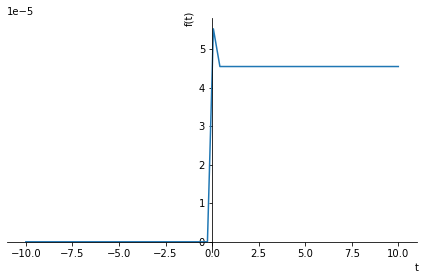

In [79]:
plot(invlap)

In [90]:
inverse_laplace_transform(5/(10000*(s+50)), s, t) # t-time s-complex time

exp(-50*t)*Heaviside(t, 1/2)/2000

In [74]:
laplace_transform(Heaviside(t)*5, t, s) # t-time s-complex time

(5/s, 0, True)

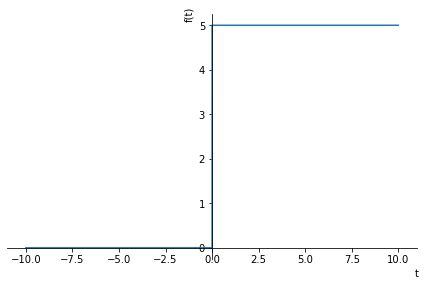

In [75]:
plot(Heaviside(t)*5)